In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

# Load and extract Guinea data

Data starting from March 2014.

In [18]:
raw_early = pd.read_csv("data/raw_early_data.csv")

In [26]:
early_data = pd.DataFrame(columns=["Date", "new_cases"])
early_data["Date"] = [i*7 for i in range(1,66)]
early_data["new_cases"] = [round(y) for y in raw_early[ ' y']]

start_row = pd.DataFrame({"Date": 0, "new_cases": 0}, index=[0])
early_data = pd.concat([start_row, early_data]).reset_index(drop=True)

early_data.to_csv("data/early_guinea_conf_cases.csv")

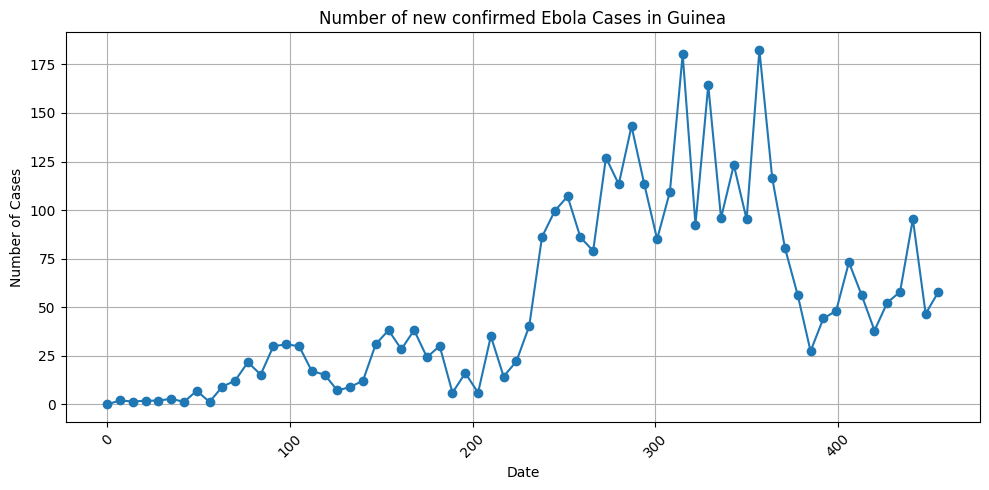

In [39]:
# plot the data
plt.figure(figsize=(10, 5))
plt.plot(early_data["Date"], early_data["new_cases"], marker='o', linestyle='-', label="New Deaths")
# plt.plot(merged_df["Date"], merged_df["new_cases"], marker='o', linestyle='-', label="New Cases")
plt.title("Number of new confirmed Ebola Cases in Guinea")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

## Cut at drop
Since the drop might indicate some itnervention or other treatment, we cut it there.

In [32]:
import copy 
cut_early = copy.deepcopy(early_data)
cut_early.drop(cut_early.tail(13).index, inplace=True)

cut_early.to_csv("data/cut_early_guinea_conf_cases.csv")

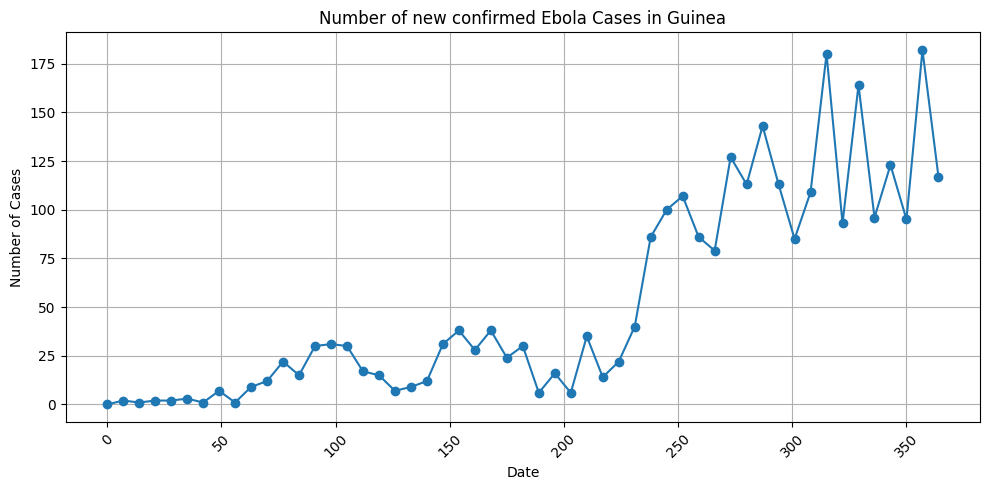

In [33]:
# plot the data
plt.figure(figsize=(10, 5))
plt.plot(cut_early["Date"], cut_early["new_cases"], marker='o', linestyle='-', label="New Cases")
plt.title("Number of new confirmed Ebola Cases in Guinea")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

## Load simulator

In [17]:
import seirdb

Guinea population size was roughly 10 million at that time (very small numbers here.)

We now that by the data start 482 have at some time been infected with ebola and 287 already died.\
However, the question is how many of the dead have been buried and how many of the 195 non-dead infected are still infected or recovered?\
--> Initial state might influence results.

**Assumptions:**

- 80% of confirmed deaths are already buried
- 80% of already infected already recovered
- Half of the remaining infected are in the exposed state.

In [26]:
tstart = merged_df.Date.iloc[0]
tend = merged_df.Date.iloc[-1]

# artifical u0
N = 10000000.0
E0 = 48
I0 = 48
R0 = 386
D0 = 57
B0 = 230
S0 = N-(E0+I0+R0+D0+B0)
u0 = [S0, E0, I0, R0, D0, B0]

# parameter vector with following parameter order:
# TransmissionProbabilityOnContact, TimeExposed, TimeInfected, ProbabilityToRecover, TransmissionProbabilityFromDead, TimeToBurial
p0 = [0.0, 14.0, 14.0, 0.4, 0.0, 3.0]

Flow order is\
S -> E\
E -> I\
I -> R\
I -> D\
D -> B

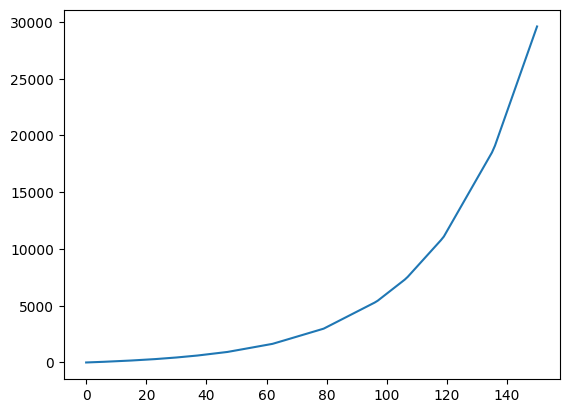

In [ ]:
p0 = [0.0055, 5.0, 4.0, 0.53, 0.025, 2.0]

p_paper = [0.1, 6.0, 11.0, 0.3, 0.20, 4.0]

mode_sim = seirdb.seirdb_flow(p_paper, u0, tstart, 150)
cases_sim = mode_sim[0]
flows_sim = mode_sim[1]

time = flows_sim[0,:]
flow_cases = flows_sim[2,:]  # E -> I
flow_deaths = flows_sim[4,:]  # I -> D
plt.plot(time, flow_cases)